In [1]:
#### Code for "Z Zener Hollomon parameter" analysis ####
# Import all the required library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy.optimize import curve_fit as cft

In [2]:
# importing current dirctory
import os
os.getcwd()
### Actual code start from here
## Giving path name and importing data
sr = np.transpose(np.log([0.001,0.01,0.1,1,10])) # defining logrithmic strain rate
t = np.array([1173, 1223, 1273, 1323, 1373])# defining given temperature
temp = np.transpose(1/t*10000)
a = 0.0117 # the alpha parameter
stress_max = []
for sheet in range(5):
    data = pd.read_excel('D3_adiabatic_corrected_stress_strain_data1.xlsx',sheet_name = sheet)
    data1 = data.iloc[2:683, 0:10].astype(float)
    stress = data1.iloc[:,[1,3,5,7,9]] # to select out desrired column
    stress_max.append(stress.max()) # filling or adding all 'stress_max' data by loop
stress_max = np.transpose(np.reshape(stress_max,(5,5))) # storing data in mxm matrix, at const. temp.
stress_am = a*stress_max # peak stress with alpha parameter
ln_stress_t = np.log(np.sinh(stress_am)) # ln of sinh(stress), at const. temp based column wise

/tmp/ipykernel_648/268577909.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('D3_nsinhstress_lnSR.png', figsize=(8, 8), dpi=300)


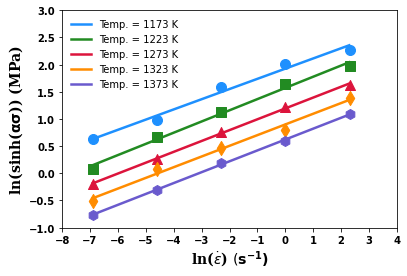

In [3]:
### plotting the ln(sinh(stress_am) vs ln(sr) for calculation of 'n'
# defining marker and color
mark = ['o', 's', '^', 'd', 'h', 'X']
colr = ['#1E90FE', '#228B22', '#DC143C', '#FF8C00', '#6A5ACD', '#4169E1']
#lgd =  ('Temp. = 1173 K', 'Temp. = 1223 K', 'Temp. = 1273 K', 'Temp. = 1323 K', 'Temp. = 1373 K')
## defining linear function
def objective(x, m, c):
    return m*x + c
n = [] # the 'n' exponent
for i in range(5):
    ln_st = ln_stress_t[:,i]
    pmt_t, _ = cft(objective, sr, ln_st) # liner fit with having fitting parameters (= pmt)
    m, c = pmt_t # the fitted linear parameters
    n.append(1/m) # the adding all the 'm =slope' values in to 'n'
    plt.scatter(sr,ln_st, marker = mark[i], color = colr[i], s = 100) # plotting the data
    x_line_t = np.arange(min(sr), max(sr), 0.1) # giving 'sr' data range to fit line with 0.5 incrememt of data
    y_line_t = objective(x_line_t, m, c) # the 'fitted 'ln_s' value for for line plot
    plt.plot(x_line_t,y_line_t,color =colr[i], linewidth = 2.5) 
plt.legend(['Temp. = 1173 K', 'Temp. = 1223 K', 'Temp. = 1273 K', 'Temp. = 1323 K', 'Temp. = 1373 K'], frameon=False)
## labeling the plot
from pylab import *
rc('axes', linewidth=2)
fontsize = 10
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
ax.set_xticks(np.arange(-8, 5, 1))
ax.set_yticks(np.arange(-1, 3.5, 0.5))
plt.xlabel(r'ln($\dot\epsilon$) $(\mathbf{s^{-1})}$',  fontsize=14, fontweight='bold', fontfamily = 'serif')
plt.ylabel(r'ln(sinh($\mathbf{\alpha\sigma}$)) (MPa)',  fontsize=14, fontweight='bold', fontfamily = 'serif')
plt.savefig('D3_nsinhstress_lnSR.png', figsize=(8, 8), dpi=300)
## The avrerage 'n'
avg_n = np.mean(n)

/tmp/ipykernel_648/2936707288.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('D3_lnsinhstress_T.png', figsize=(8, 8), dpi=300)


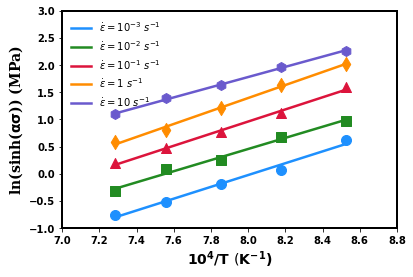

In [4]:
### plotting the ln(sinh(stress_am) vs 1/temp for calculation of 'Q'
ln_stress_sr = np.transpose(ln_stress_t) # 1st sorting out 'ln_stress' matrix as per constant strain rate
## defining linear function
def objective(x, g, h):
    return g*x + h
s = [] # the 'slope = g' of the above equation 
b = [] # The 'intercept = h' of the above equation
for i in range(5):
    ln_ssr = ln_stress_sr[:,i]
    pmt_sr,_ = cft(objective, temp, ln_ssr) # liner fit with having fitting parameters
    g, h = pmt_sr # the fitted linear parameters
    s.append(g) # the adding all the 'g =slope" values in to 's'
    b.append(h) # Adding all the 'h = intercept' values in to 'b'
    plt.scatter(temp, ln_ssr, marker = mark[i], color = colr[i], s = 100) # plotting data
    x_line_sr = np.arange(min(temp), max(temp), 0.01) # giving 'temp' data range to fit line
    y_line_sr = objective(x_line_sr, g, h) # the 'fitted 'ln_s' value for for line plot
    plt.plot(x_line_sr,y_line_sr, color = colr[i], linewidth = 2.5)  
plt.legend(['$\dot\epsilon = 10^{-3}$ $s^{-1}$', '$\dot\epsilon = 10^{-2}$ $s^{-1}$', '$\dot\epsilon = 10^{-1}$ $s^{-1}$', '$\dot\epsilon = 1$ $s^{-1}$', '$\dot\epsilon = 10$ $s^{-1}$'], frameon=False)
## labeling the plot
from pylab import *
rc('axes', linewidth=2)
fontsize = 10
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
ax.set_xticks(np.arange(7.0, 8.8 ,0.2))
ax.set_yticks(np.arange(-1, 3.5, 0.5))
plt.xlabel(r'$\mathbf{10^4/T}$ $(\mathbf{K^{-1})}$',  fontsize=14, fontweight='bold', fontfamily = 'serif')
plt.ylabel(r'ln(sinh($\mathbf{\alpha\sigma}$)) (MPa)',  fontsize=14, fontweight='bold', fontfamily = 'serif')
plt.savefig('D3_lnsinhstress_T.png', figsize=(8, 8), dpi=300)
## The calculation of "avg. Q value
R = 8.314 # the universal gas constant
Q = []
for i in range(5):
    Q.append(s[i]*n[i]*R*10000)    
## The avg. Q 
avg_Q = np.mean(Q)

In [5]:
### calculation for "A" 
v = [] # v = n*b (i.e. stress exponent* intercept of above plot)
for i in range(5):
    v.append(n[i]*b[i])
A = np.exp(sr-v) # The sr-v = ln(strain_rate)-(stress_exponent*intercept)
## The avg. A
avg_A = np.mean(A)

In [7]:
### Calculation of "Z" parmater at temperature range of 1223-1323 K
## based on individual Q values for different strain rates
lnZ_h = [] # for 'high strain rate sensitivity' regime
lnZ_l = [] # for 'low strain rate sensitivity' regime
for j in range(3):
    lnZ_h.append(sr[1] + Q[1]/(R*t[j+1]))
    lnZ_l.append(sr[3] + Q[3]/(R*t[j+1]))
## based on average Q values for entire strain rate range i.e combining low and high 
lnz = []
for j in [1,3]:
    for k in range(3):
        lnz.append(sr[j] + avg_Q/(R*t[k+1]))
# Now selecting out ln(sinh(a*sigma_max)) values for high and low SRS resimes
lnsinhs_H = [] # this varibale select out the required stress as per high SRSR from "ln_stress_sr"
lnsinhs_L = [] # this varibale select out the required stress as per low SRSR from "ln_stress_sr"
for k in range(3):
    lnsinhs_H.append(ln_stress_sr[k+1,1])
    lnsinhs_L.append(ln_stress_sr[k+1,3])
lnsinhs_HL = lnsinhs_H + lnsinhs_L # it combines both low and high regiems

/tmp/ipykernel_648/2441028881.py:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('D3_lnsinhstress_lnZ.png', figsize=(8, 8), dpi=300)


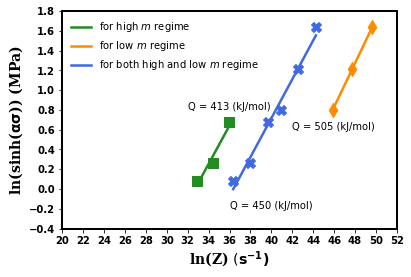

In [8]:
### linear plotting of the ln(z&Z) vs ln(sinh(asigma)) data
## for individual Q for low and high
# defining linear equation for high m
def objective (x, d, e):    
    return x*d + e
pmt_h, _ = cft(objective, lnZ_h, lnsinhs_H)
d, e = pmt_h # parameter of linear equation
plt.scatter(lnZ_h, lnsinhs_H, marker = mark[1], color = colr[1], s = 100)
x_h = np.arange(min(lnZ_h), max(lnZ_h), 0.25)
y_h = objective(x_h, d, e)
plt.plot(x_h,y_h, color = colr[1], linewidth = 2.5)
# defining equation for low m
def objective (x, f, p):
    return x*f + p
pmt_l, _ = cft(objective, lnZ_l, lnsinhs_L)
f, p = pmt_l 
plt.scatter(lnZ_l, lnsinhs_L, marker = mark[3], color = colr[3], s = 100)
x_l = np.arange(min(lnZ_l), max(lnZ_l), 0.25)
y_l = objective(x_l, f, p)
plt.plot(x_l, y_l, color = colr[3], linewidth = 2.5)
## for combined/ avg. Q for both high and low regime
# 1st estimation of lnZ from avg. Q 
lnZ_hl = []
for j in [1,3]:
    for k in range(3):
        lnZ_hl.append(sr[j] + avg_Q/(R*t[k+1]))
# defining linear equation
def objective (x, r, w):
    return x*r + w
pmt_a, _ = cft(objective, lnZ_hl, lnsinhs_HL)
r, w = pmt_a # defining linear parameters
plt.scatter(lnZ_hl, lnsinhs_HL, marker = mark[5], color = colr[5], s = 100)
x_a = np.arange(min(lnZ_hl), max(lnZ_hl), 0.1)
y_a = objective(x_a, r, w)
plt.plot(x_a, y_a, color = colr[5], linewidth=2.5)
# defining legend
plt.legend(['for high $m$ regime', 'for low $m$ regime', 'for both high and low $m$ regime'], frameon = False)
# to write text inside the plot
plt.text(32, 0.8, 'Q = 413 (kJ/mol)') # Q for high 'm'
plt.text(42, 0.6, 'Q = 505 (kJ/mol)') # Q for low 'm'
plt.text(36, -0.2, 'Q = 450 (kJ/mol)') # avg. Q for combining both high and low
## labeling the plot
from pylab import *
rc('axes', linewidth=2)
fontsize = 10
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
ax.set_xticks(np.arange(20.0, 54.0 ,2.0))
ax.set_yticks(np.arange(-0.4, 2, 0.2))
plt.xlabel(r'ln(Z) $(\mathbf{s^{-1})}$',  fontsize=14, fontweight='bold', fontfamily = 'serif')
plt.ylabel(r'ln(sinh($\mathbf{\alpha\sigma}$)) (MPa)',  fontsize=14, fontweight='bold', fontfamily = 'serif')
plt.savefig('D3_lnsinhstress_lnZ.png', figsize=(8, 8), dpi=300)
#plt.show()

In [9]:
n

[5.332367280232647,
 4.856786861949412,
 5.0083497409611715,
 5.085062584084783,
 4.994916482336849]

In [10]:
avg_n

5.0554965899129725

In [11]:
Q

[481905.9582752076,
 412755.8931354733,
 463983.4089164277,
 504814.7849361126,
 389278.7563625975]

In [12]:
avg_Q

450547.7603251638